<p align=center><img src=https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png><p>

# <h1 align=center> **PROYECTO INDIVIDUAL Nº2** </h1>


- En el siguiente paso, retomaremos los conjuntos de datos que fueron previamente revisados en el archivo anterior. A continuación, abordaremos de manera individual los valores incorrectos que hayamos identificado en ellos.

- Comenzamos cargando librerías necesarias para lectura y visualizaciones, posterior a esto, leemos los datasets

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# <h1 align=center>**EDA: valores faltantes, valores atípicos y registros duplicados**</h1>

### <h3 align=center> **`Df1`: Total nacional de accesos a Internet fijo por banda ancha y banda angosta** </h3>
En este archivo logramos ver que este no contiene valores faltantes, ni outliers y los tipo de datos son correctos. Está listo para trabajarse.

In [101]:
df1=pd.read_excel('./data_excel/total_nacional_de_accesosainternet_fijo_x_bandaancha_angosta.xlsx', sheet_name='Totales')

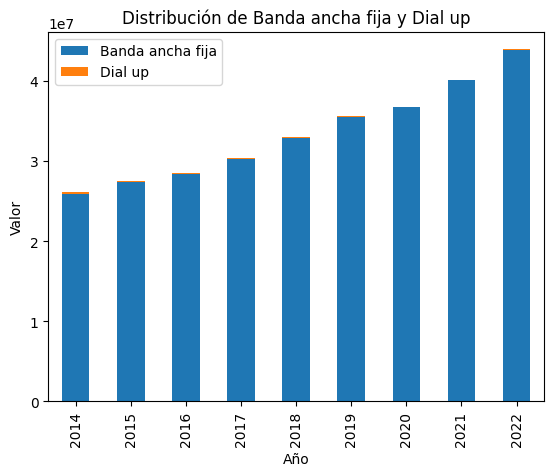

In [256]:
df1_groupby = df1.groupby('Año')[['Banda ancha fija', 'Dial up']].sum()
df1_groupby.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Distribución de Banda ancha fija y Dial up')
plt.show()

- Distribución del uso de internet de banda ancha fija y dial up a lo largo del tiempo. En el eje `x` se muestran los años desde 2014 hasta 2022, y en el eje `y` se muestran valores de 0 a 4 elevado 1e7. Las barras de banda ancha fija son consistentemente más altas que las de dial up ya que ofrece una experiencia de Internet más rápida, estable y versátil en comparación con la conexión dial-up, lo que la convierte en una opción superior para la mayoría de las necesidades de los usuarios en la actualidad.

- Listo para pasarse a la carpeta con datasets limpios

In [114]:
df1_f= df1.to_excel('./data_limpia_excel/total_nacional_de_accesosainternet_fijo_x_bandaancha_angosta_limpio.xlsx', sheet_name='Totales', index=False)

### <h3 align=center> **`Df2`: Accesos a banda ancha y banda angosta por provincia** </h3>

In [4]:
df2=pd.read_excel('./data_excel/accesos_banda_ancha_y_angostaXprovincia.xlsx', sheet_name='Hoja1')

In [5]:
df2

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26304,460.0,26764
860,2014,1,Santa Fe,506000,612.0,506612
861,2014,1,Santiago Del Estero,37124,9.0,37133
862,2014,1,Tierra Del Fuego,27272,766.0,28038


- Contiene muy poca cantidad de valores faltantes respecto al total de valores. Vamos a llenarlos con 0 

In [6]:
#porcentaje de nulos por columna
n_records = len(df2)
def valores_inexistentes_col(df2):
    for columna in df2:
        print("{} | {} | {}".format(
            df2[columna].name, len(df2[df2[columna].isnull()]) / (1.0*n_records), df2[columna].dtype
        ))

valores_inexistentes_col(df2)

Año | 0.0 | int64
Trimestre | 0.0 | int64
Provincia | 0.0 | object
Banda ancha fija | 0.0 | int64
Dial up | 0.0023148148148148147 | float64
Total | 0.0 | int64


In [7]:
df2['Dial up']= df2['Dial up'].fillna(0)

In [8]:
#Convertimos a entero
df2['Dial up']= df2['Dial up'].astype(int)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               864 non-null    int64 
 1   Trimestre         864 non-null    int64 
 2   Provincia         864 non-null    object
 3   Banda ancha fija  864 non-null    int64 
 4   Dial up           864 non-null    int32 
 5   Total             864 non-null    int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 37.3+ KB


In [40]:
def outliers_col(df2):
    for columna in df2:
        if df2[columna].dtype != np.object_:
            n_outliers = len(df2[np.abs(stats.zscore(df2[columna])) > 3])    
            print("{} | {} | {}".format(
                df2[columna].name,
                n_outliers,
                df2[columna].dtype
        ))

outliers_col(df2)

Año | 0 | int64
Trimestre | 0 | int64
Banda ancha fija | 36 | int64
Dial up | 33 | int32
Total | 36 | int64


- Respecto a la fórmula de Z score, nos salen dichos valores atípicos. Vamos a observarlos en boxplots

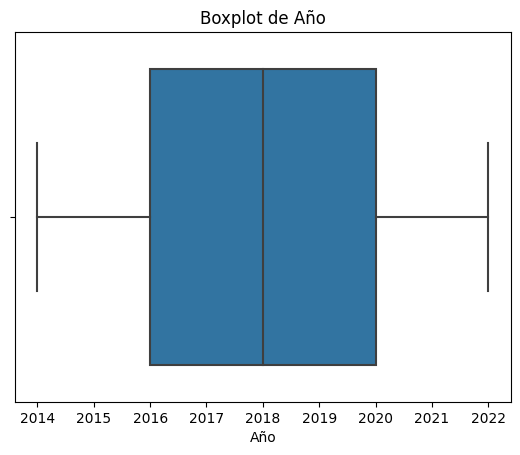

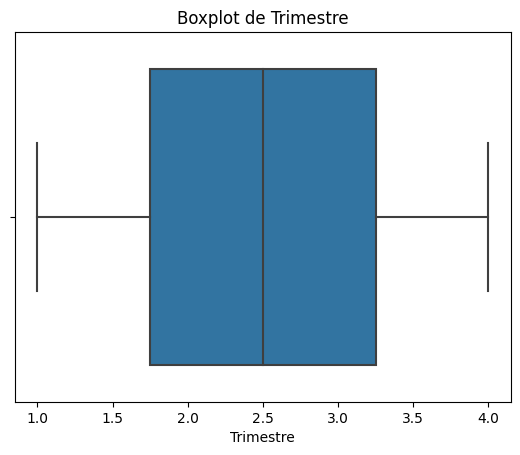

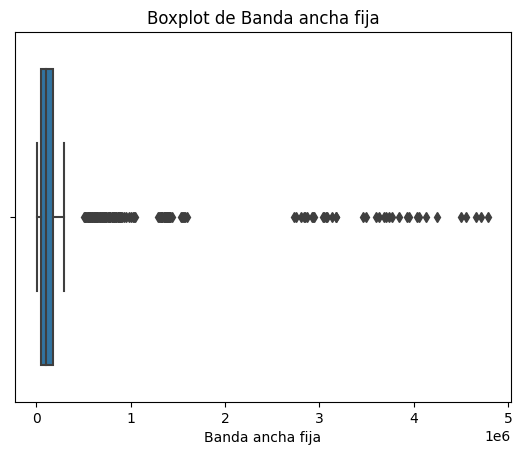

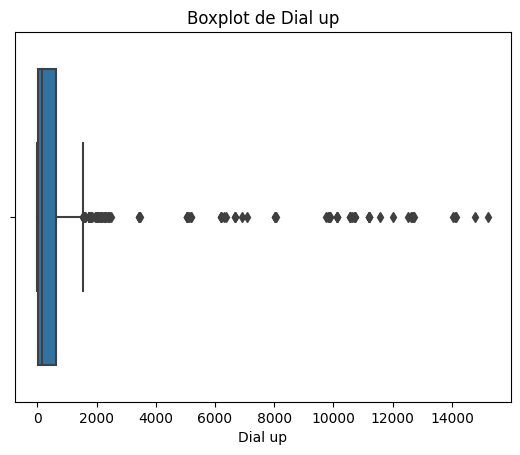

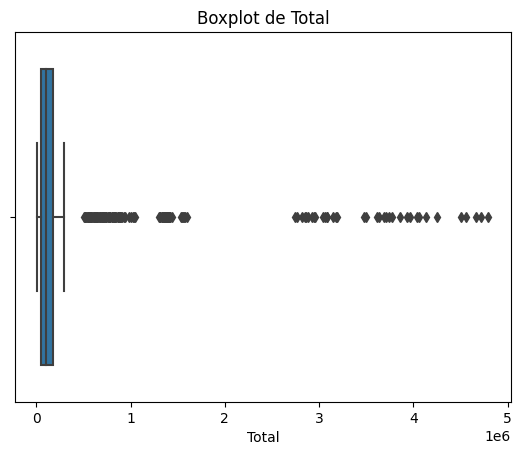

In [41]:
columnas_numericas = df2.select_dtypes(include='number')
for col in columnas_numericas:
    sns.boxplot(x=df2[col])
    plt.title('Boxplot de ' + col)
    plt.show()

- No necesariamente los consideramos outliers, ya que algunas provincias son mas grandes geográficamente que otras, por ejemplo en Buenos Aires puede que tomen un valor de mas de 400k mientras que en Tierra de fuego que es una de las provincias más pequeñas, ese valor sería demasiado.

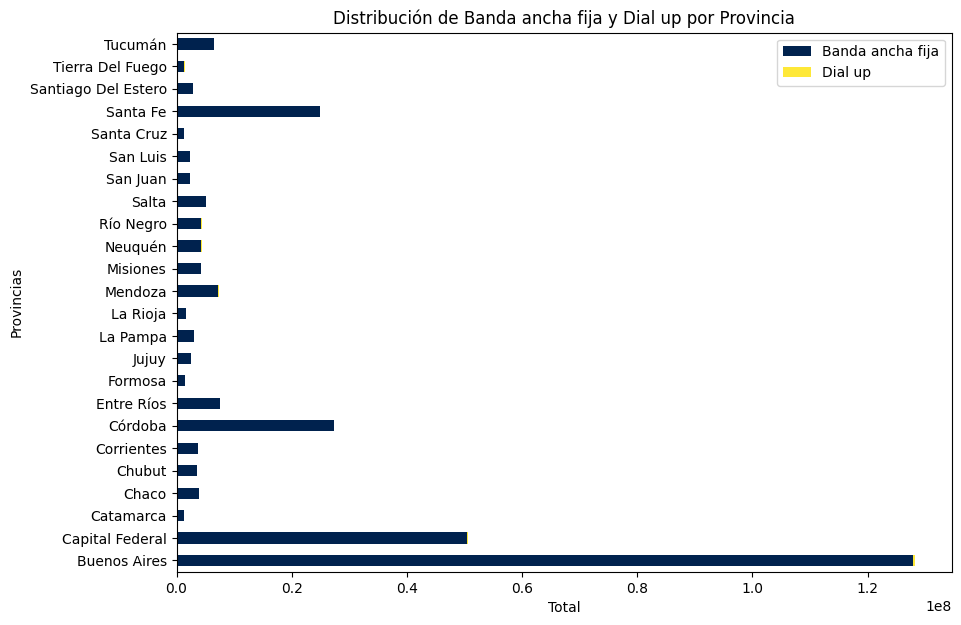

In [10]:
df2_grouped = df2.groupby('Provincia')[['Banda ancha fija', 'Dial up']].sum()
df2_grouped.plot(kind='barh', stacked=True, figsize=(10,7),colormap='cividis')
plt.title('Distribución de Banda ancha fija y Dial up por Provincia')
plt.xlabel('Total')
plt.ylabel('Provincias')
plt.show()

- Graficamos la distribución del uso de internet de banda ancha y dial up en diferentes provincias de Argentina. En el eje y se muestran las diferentes provincias y en el eje x se muestra el número total de usuarios con exponente 1e8. El mayor número de usuarios se encuentra en Buenos Aires, seguido de Capital Federal y después tenemos a Córdoba y Santa Fe un poco reñidos. Podemos observar lo dominante que es Banda Ancha en todos los casos.

- Listo para trabajarse, lo pasamos limpio

In [130]:
df2_final=df2.to_excel('./data_limpia_excel/accesos_banda_ancha_y_angostaXprovincia_limpio.xlsx', sheet_name='Hoja1',index=False)

### <h3 align=center> **`Df3`: Acceso a Internet fijo por tecnología y provincia** </h3>

In [12]:
df3=pd.read_excel('./data_excel/acceso_internetFijo_x_tecnologiaYprovincia.xlsx', sheet_name='Hoja2')

- En este df tenemos unas fila completa con nulos, vamos a dropear esa linea

In [13]:
nulos= df3[df3.isnull().any(axis=1)]
nulos

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
865,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df3.drop([864,865] ,inplace=True)

- Ahora, en la columna trimestre y Año hay valores que nos impide convertir los tipos a enteros, vamos a corregir

In [15]:
df3['Trimestre'].value_counts() 

Trimestre
4      216
3      192
2      192
1      192
3 *     24
2 *     24
1 *     24
Name: count, dtype: int64

In [16]:
df3['Trimestre']= df3['Trimestre'].replace({"3 *": "3", "2 *": "2", "1 *": "1"}).astype(int)#reemplazamos los valores con asterisco y convertimos a entero

In [17]:
df3['Año'].value_counts() 

Año
2022      96
2021      96
2020      96
2018      96
2017      96
2016      96
2015      96
2014      96
2019 *    72
2019      24
Name: count, dtype: int64

In [18]:
df3['Año']= df3['Año'].replace({"2019 *":"2019"}).astype(int)#solo en el año 2019 hay un valor con asterisco, lo reemplazamos y convertimos a entero

In [19]:
df3['Año'].value_counts() 

Año
2022    96
2021    96
2020    96
2019    96
2018    96
2017    96
2016    96
2015    96
2014    96
Name: count, dtype: int64

In [20]:
numeric_columns = ['Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total', 'Año']
df3[numeric_columns] = df3[numeric_columns].astype('int32') #convertimos a entero

In [21]:
df3.rename(columns={'ADSL':'Adsl','Cablemodem':'Cable modem'},inplace=True)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    int32 
 1   Trimestre     864 non-null    int32 
 2   Provincia     864 non-null    object
 3   Adsl          864 non-null    int32 
 4   Cable modem   864 non-null    int32 
 5   Fibra óptica  864 non-null    int32 
 6   Wireless      864 non-null    int32 
 7   Otros         864 non-null    int32 
 8   Total         864 non-null    int32 
dtypes: int32(8), object(1)
memory usage: 33.9+ KB


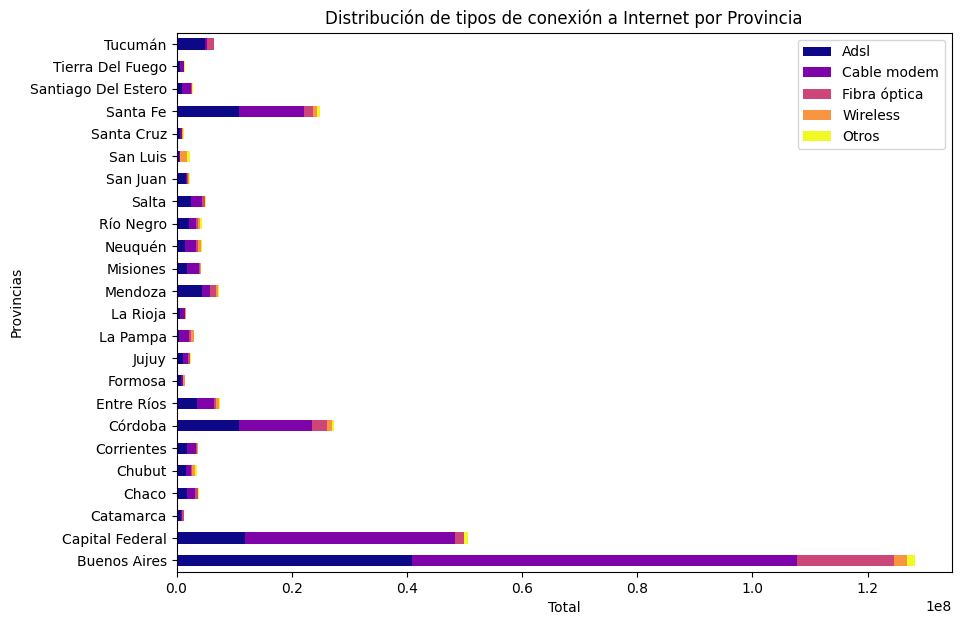

In [26]:
df3_grouped = df3.groupby('Provincia')[['Adsl', 'Cable modem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
df3_grouped.plot(kind='barh', stacked=True, figsize=(10,7),colormap='plasma')
plt.title('Distribución de tipos de conexión a Internet por Provincia')
plt.xlabel('Total')
plt.ylabel('Provincias')
plt.show()

- En el gráfico de barras anteror, representa la distribución de diferentes tipos de conexiones a internet por provincia, los tipos más comunes son Adsl, Cable modem y Fibra Óptica. En el siguiente gráfico de lineas podremos ver como han cambiado a lo largo de los años.

<Axes: xlabel='Año'>

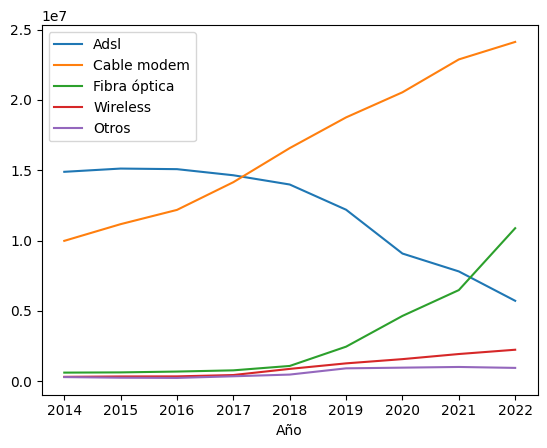

In [31]:
df3.groupby('Año')[['Adsl', 'Cable modem', 'Fibra óptica', 'Wireless', 'Otros']].sum().plot()

- Aunque en las provincias vistas anteriormente eran Cable modem, Adsl y Fibra óptica las que dominaban, sin embargo acá vemos que Adsl va en picada hacia abajo conforme pasa el tiempo, mientras que Fibra óptica gana terreno por sus carácterísticas de velocidad, fiabilidad y capacidad de ancho de banda hace que vaya en subida y más clientes estén optando por escoger este tipo. Podemos ver que Cable modem sigue siendo lider, pero no sabemos por cuánto tiempo...
Sin embargo, la elección entre Cable módem y Fibra óptica dependerá de la ubicación, las necesidades individuales y las ofertas de los proveedores de internet en cada área. La competencia entre estas tecnologías ha impulsado mejoras en ambas, lo que beneficia a los consumidores con una mayor variedad de opciones de conectividad.

In [49]:
#sin duplicados
duplicates = df3.duplicated()
df3[duplicates]

,Año,Trimestre,Provincia,Adsl,Cable modem,Fibra óptica,Wireless,Otros,Total


- Pasamos a limpio

In [50]:
df3_f= df3.to_excel('./data_limpia_excel/acceso_internetFijo_x_tecnologiaYprovincia_limpio.xlsx', sheet_name='Hoja2', index=False)

### <h3 align=center> `Df4`: **Velocidad media de bajada de Internet fijo por provincia** </h3>

In [11]:
df4=pd.read_excel('./data_excel/velocidadmedia_de_bajada_internetFijo_x_provincia.xlsx', sheet_name='Hoja1')

In [52]:
df4.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


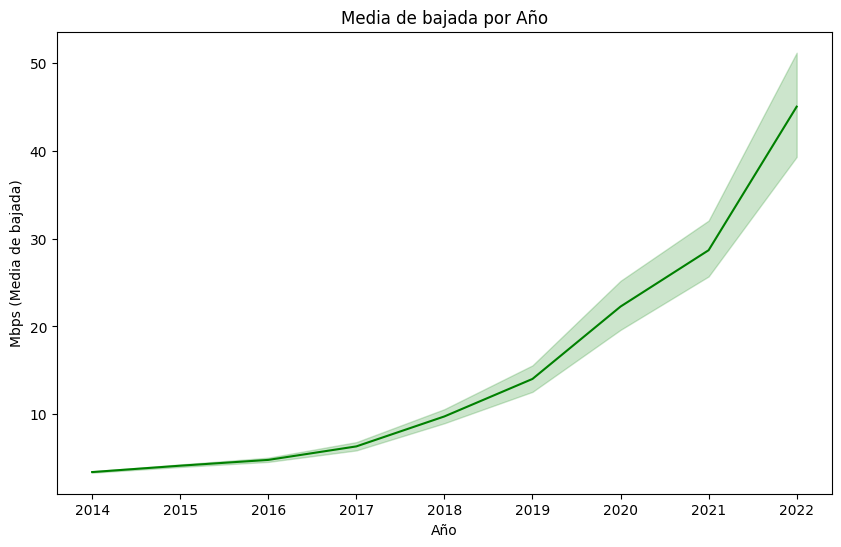

In [120]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=df4,color='green')
plt.title('Media de bajada por Año')
plt.show()

- La velocidad media de descarga de Internet ha aumentado en los últimos años debido a avances tecnológicos y mayores inversiones en infraestructura de red. Los proveedores de servicios de Internet han desplegado conexiones de fibra óptica y mejorado las redes de cable lo que satisface la creciente demanda de aplicaciones en línea, como streaming, juegos y trabajo remoto. Esto ha llevado a un aumento constante en la velocidad promedio de descarga en todo el mundo. Lo que también logramos ver es que a partir del 2019 tuvo un incremento considerable, un punto importante acá es que en 2019 comenzó pandemia, lo que muy probablemente los servicios de internet comenzaron a mejorar sus servicios y la tecnología implementada debido a la alta demanda de internet debido al confinamiento.

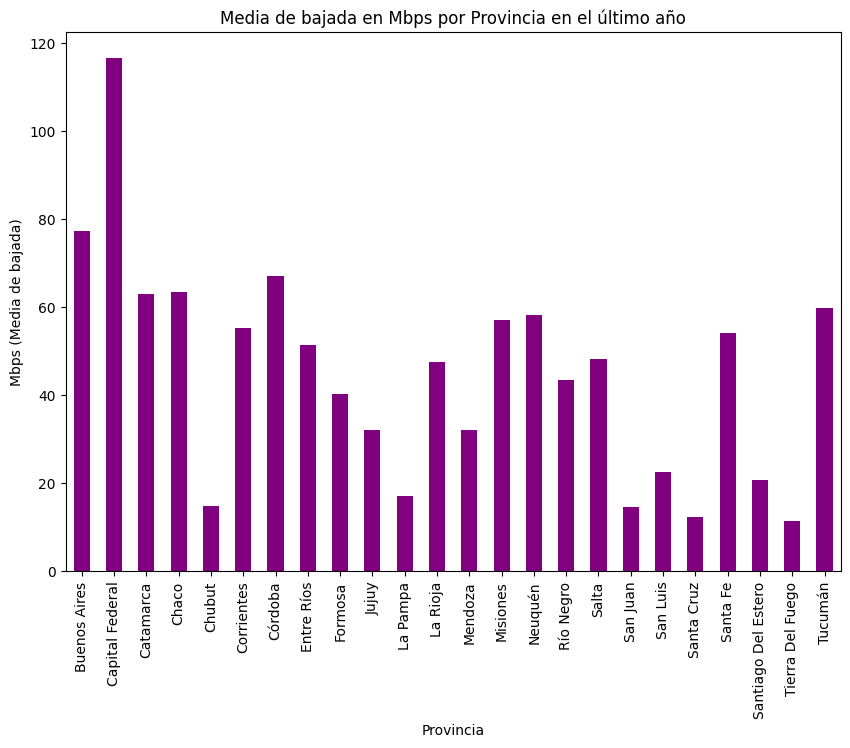

In [124]:
# Filtrar los datos para el último año
df4_last_year = df4[df4['Año'] == df4['Año'].max()]

# Agrupar por Provincia y calcular la media de 'Mbps (Media de bajada)'
df4_grouped = df4_last_year.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Crear un gráfico de barras
df4_grouped.plot(kind='bar', figsize=(10,7), color='purple')
plt.title('Media de bajada en Mbps por Provincia en el último año')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

- Graficamos por provincia la velocidad media de bajada Mbps en el último año (2022), logrando ver que Capital Federal tiene el valor más alto con casi 120 mbps, seguido de Buenos Aires y Córdoba.
Calculamos el valor promedio en dicho año y vemos como resultado 45 mbps.

In [68]:
ultimo_año = df4['Año'].max()
df4_ultimo_año = df4[df4['Año'] == ultimo_año]
promedio_mbps = df4_ultimo_año['Mbps (Media de bajada)'].mean()
print(f"{round(promedio_mbps,2)} Mbs promedio en el año 2022")

45.04 Mbs promedio en el año 2022


- Pasamos a csv el df limpio

In [69]:
df4_f= df4.to_excel('./data_limpia_excel/velocidadmedia_de_bajada_internetFijo_x_provincia_limpio.xlsx', sheet_name='Hoja1', index=False)

### <h3 align=center> **`Df5`: Acceso a Internet Fijo por rangos de velocidad de bajada y provincia** </h3>

In [70]:
df5=pd.read_excel('./data_excel/acceso_internetFijo_x_rangosdevelocidad_deBajada_y_provincia.xlsx', sheet_name='Hoja2')

In [71]:
df5.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


- Renombramos nombres de las columnas

In [72]:
nuevos_nombres = {
    'HASTA 512 kbps': 'Hasta 512 kbps',
    '+ 512 Kbps - 1 Mbps': 'Entre 512 Kbps y 1 Mbps',
    '+ 1 Mbps - 6 Mbps': 'Entre 1 Mbps y 6 Mbps',
    '+ 6 Mbps - 10 Mbps': 'Entre 6 Mbps y 10 Mbps',
    '+ 10 Mbps - 20 Mbps': 'Entre 10 Mbps y 20 Mbps',
    '+ 20 Mbps - 30 Mbps': 'Entre 20 Mbps y 30 Mbps',
    '+ 30 Mbps': 'Más de 30 Mbps',
    'OTROS': 'Otros'
    
}

df5.rename(columns=nuevos_nombres, inplace=True)


In [73]:
df5.head(1)

,Año,Trimestre,Provincia,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Otros,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0


In [74]:
#nulos
filas_con_nulos = df5[df5['Otros'].isna()]
filas_con_nulos

,Año,Trimestre,Provincia,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,Otros,Total
337,2019,2,Capital Federal,74.0,1027.0,281370.0,124087.0,239691.0,296155.0,475991.0,NaN,1418395.0
347,2019,2,La Rioja,9.0,11.0,39819.0,4297.0,4857.0,13.0,1298.0,NaN,50304.0
348,2019,2,Mendoza,20.0,2522.0,205165.0,2971.0,10092.0,1256.0,234.0,NaN,222260.0
355,2019,2,Santa Cruz,25.0,84.0,24861.0,3806.0,1202.0,28.0,4.0,NaN,30010.0
358,2019,2,Tierra Del Fuego,6.0,123.0,41824.0,4241.0,1573.0,96.0,32.0,NaN,47895.0
359,2019,2,Tucumán,16.0,157.0,78891.0,44296.0,24291.0,628.0,18394.0,NaN,166673.0


In [75]:
#reemplazamos los nulos por 0
df5['Otros'].fillna(0, inplace=True)

In [76]:
columnas_numericas = df5.select_dtypes(include='number')
df5[columnas_numericas.columns] = columnas_numericas.astype('int32')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      864 non-null    int32 
 1   Trimestre                864 non-null    int32 
 2   Provincia                864 non-null    object
 3   Hasta 512 kbps           864 non-null    int32 
 4   Entre 512 Kbps y 1 Mbps  864 non-null    int32 
 5   Entre 1 Mbps y 6 Mbps    864 non-null    int32 
 6   Entre 6 Mbps y 10 Mbps   864 non-null    int32 
 7   Entre 10 Mbps y 20 Mbps  864 non-null    int32 
 8   Entre 20 Mbps y 30 Mbps  864 non-null    int32 
 9   Más de 30 Mbps           864 non-null    int32 
 10  Otros                    864 non-null    int32 
 11  Total                    864 non-null    int32 
dtypes: int32(11), object(1)
memory usage: 44.0+ KB


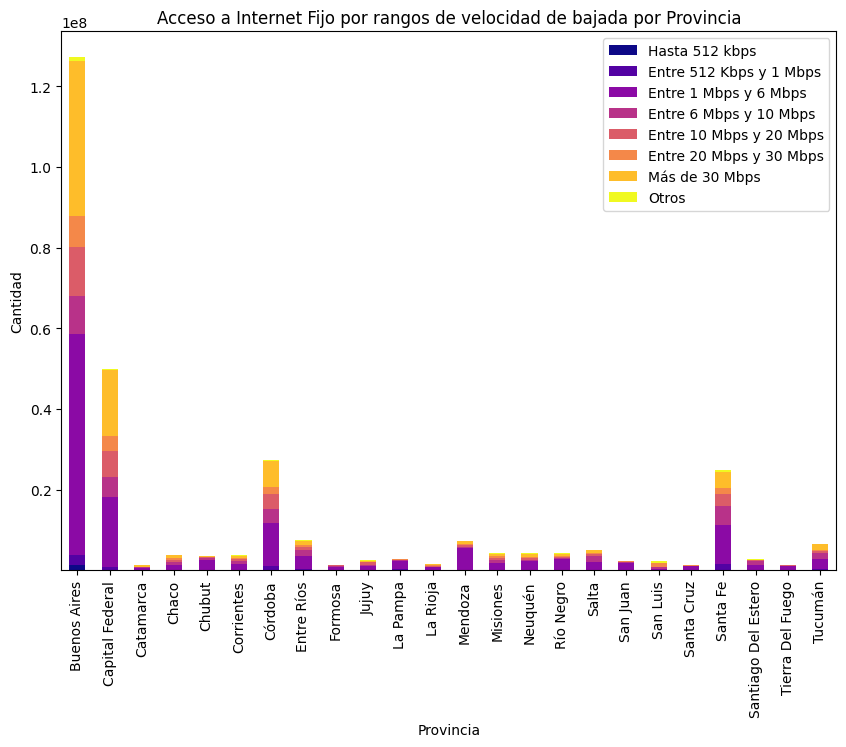

In [125]:
df5_grouped = df5.drop(['Total', 'Año', 'Trimestre'], axis=1).groupby('Provincia').sum()
df5_grouped.plot(kind='bar', stacked=True, figsize=(10,7), colormap='plasma')
plt.title('Acceso a Internet Fijo por rangos de velocidad de bajada por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

- En general podemos ver que la velocidad entre 1 y 6 Mbps se encuentra en mayormente en todas las ciudades o provincias. Las ciudades grandes suelen tener velocidades de internet más altas(más de 30 Mbps) debido a varios factores por ejemplo en la infraestructura. Estas ciudades por lo general suelen tener tecnología más moderna y avanzada como la fibra óptica que permite velocidades de internet más rápidas. Otro factor puede ser la demanda, debido a la cantidad de empresas, instituciones educativas o bien de uso personal, que requieren de una conexión rápida. Por otro lado en las ciudades más pequeñas la infraestructura puede ser antigua y la inversión en mejoras suele ser menor.

In [98]:
df5_f=df5.to_excel('./data_limpia_excel/acceso_internetFijo_x_rangosdevelocidad_deBajada_y_provincia_limpio.xlsx', sheet_name='Hoja2', index=False)

### <h3 align=center> `Df6`: **Accesos a Internet fijo por velocidad bajada y provincia** </h3>

- Para este df en especifico, considero que no es reelevante para el desarrollo del proyecto, así que la dejamos así

In [99]:
df6=pd.read_excel('./data_excel/Accesos_Internetfijoporvelocidadbajada_y_provincia.xlsx')

In [100]:
df6.head(1)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,2048 Mbps,2529 Mbps,3072 Mbps,4000 Mbps,5000 Mbps,5125 Mbps,6000 Mbps,7000 Mbps,8000 Mbps,10000 Mbps
0,2022.0,4.0,Buenos Aires,97634.0,18.0,0.0,0.0,28724.0,192.0,4611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <h3 align=center> **`Df7`: Accesos a Internet fijo por velocidad de bajada y localidad** </h3>

- Para este df en especifico, considero que no es reelevante para el desarrollo del proyecto, así que la dejamos así

In [186]:
df7=pd.read_excel('./data_excel/AccesosaInternetfijo_por_velocidaddebajada_y_localidad.xlsx')

In [187]:
df7.head(1)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,950 Mbps,1000 Mbps,1024 Mbps,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6208.0


### <h3 align=center> **`Df8`: Accesos a Internet fijo por tecnología y localidad** </h3>

In [107]:
df8=pd.read_excel('./data_excel/Accesos_Internetfijoportecnologia_y_localidad.xlsx')

In [108]:
df8.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


- Ponemos en letra capital los encabezados de las columnas

In [109]:
nuevos_nombres = {}
for columna in df8.columns:
    nuevos_nombres[columna] = ' '.join(word.capitalize() for word in columna.split())
df8.rename(columns=nuevos_nombres, inplace=True)


In [110]:
df8.head()

,Provincia,Partido,Localidad,Link Indec,Adsl,Cablemodem,Dial Up,Fibra Optica,Otros,Satelital,Wimax,Wireless,Total General
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


- Convertimos a enteros

In [111]:
columnas_a_convertir = ['Adsl', 'Cablemodem','Dial Up','Fibra Optica','Otros','Satelital','Wimax','Wireless','Total General']
df8[columnas_a_convertir] = df8[columnas_a_convertir].astype('int32')

- Pasamos a letra capital los valores de las siguientes columnas

In [112]:
columnas_a_transformar = ['Provincia', 'Partido', 'Localidad']
# Aplicamos la transformación a las celdas de las columnas
df8[columnas_a_transformar] = df8[columnas_a_transformar].applymap(lambda x: ' '.join(word.capitalize() for word in str(x).split()))


In [114]:
df8.head()

,Provincia,Partido,Localidad,Link Indec,Adsl,Cablemodem,Dial Up,Fibra Optica,Otros,Satelital,Wimax,Wireless,Total General
0,Buenos Aires,25 De Mayo,25 De Mayo,6854100,874,4542,0,3,0,852,0,706,6977
1,Buenos Aires,25 De Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,Buenos Aires,25 De Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,Buenos Aires,25 De Mayo,Norberto De La Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,Buenos Aires,25 De Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [113]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3137 non-null   object
 1   Partido        3137 non-null   object
 2   Localidad      3137 non-null   object
 3   Link Indec     3137 non-null   object
 4   Adsl           3137 non-null   int32 
 5   Cablemodem     3137 non-null   int32 
 6   Dial Up        3137 non-null   int32 
 7   Fibra Optica   3137 non-null   int32 
 8   Otros          3137 non-null   int32 
 9   Satelital      3137 non-null   int32 
 10  Wimax          3137 non-null   int32 
 11  Wireless       3137 non-null   int32 
 12  Total General  3137 non-null   int32 
dtypes: int32(9), object(4)
memory usage: 208.4+ KB


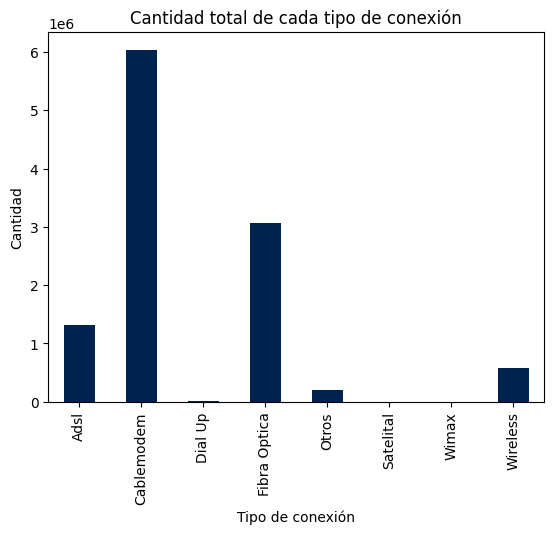

In [117]:
df8[['Adsl', 'Cablemodem', 'Dial Up', 'Fibra Optica', 'Otros', 'Satelital', 'Wimax', 'Wireless']].sum().plot(kind='bar',colormap='cividis')
plt.title('Cantidad total de cada tipo de conexión')
plt.xlabel('Tipo de conexión')
plt.ylabel('Cantidad')
plt.show()

- Como hemos observado previamente, las tecnologías de conexión más ampliamente utilizadas son el Cable Módem y la Fibra Óptica

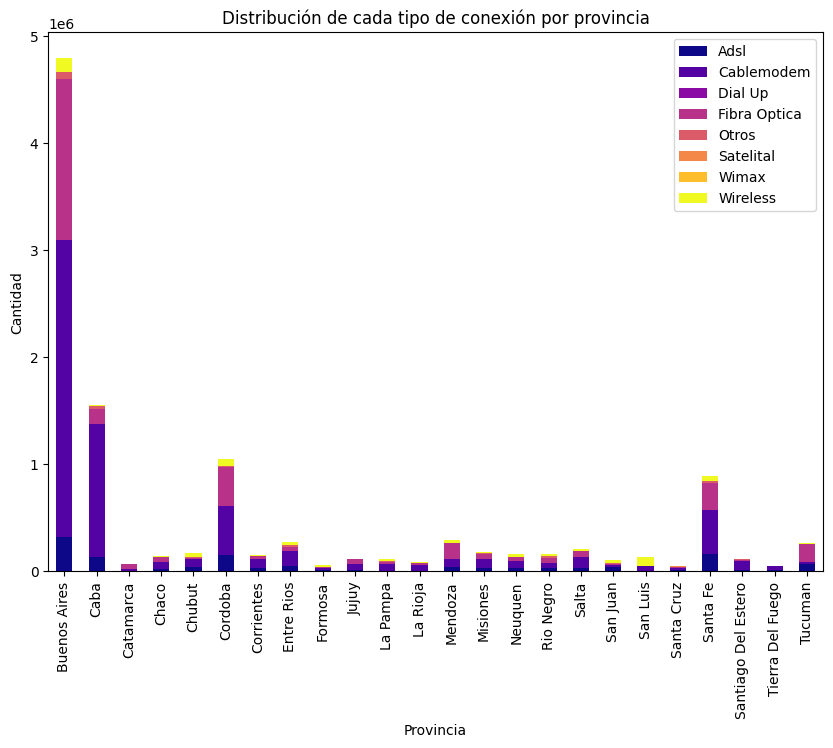

In [126]:
df8.groupby('Provincia')[['Adsl', 'Cablemodem', 'Dial Up', 'Fibra Optica', 'Otros', 'Satelital', 'Wimax', 'Wireless']].sum().plot(kind='bar', stacked=True, colormap='plasma', figsize=(10,7))
plt.title('Distribución de cada tipo de conexión por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

La visible predominancia de la fibra óptica y el cable módem en Buenos Aires, Caba, Córdoba y Santa Fe puede deberse a varios factores:
1. Infraestructura: En la Capital Federal, hay una gran oferta de Internet por fibra óptica para el hogar, y por lo tanto hay distintas compañías que proporcionan el servicio1.
2. Demanda del mercado: Más del 90% de los argentinos viven en zonas urbanas, ciudades medias o grandes. Esto puede generar una alta demanda de servicios de internet de alta velocidad, atrayendo más inversiones en estas tecnologías.
3. Políticas gubernamentales: Las políticas y regulaciones gubernamentales pueden influir en el despliegue de ciertas tecnologías de internet.

- Pasamos a csv limpio

In [127]:
df8_f=df8.to_excel('./data_limpia_excel/Accesos_Internetfijoportecnologia_y_localidad_limpio.xlsx', index=False)

### <h3 align=center> `Df9`: **Listado de localidades con conectividad a internet** </h3>

In [42]:
df9=pd.read_excel('./data_excel/Listadode_localidades_con_conectividada_internet.xlsx')

- Pasamos a letra capital el df

In [43]:
df9 = df9.apply(lambda x: x.str.title() if x.dtype == 'object' else x)
df9.rename(columns=lambda x: x.title(), inplace=True)
df9.head()

,Provincia,Partido,Localidad,Población,Adsl,Cablemódem,Dial Up,Fibra Óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,Buenos Aires,9 De Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,Si,--,--,--,--,--,Si,Si,Si,6588010.0,-35.292982,-61.407254
1,Buenos Aires,9 De Julio,Carlos María Naón,497,--,--,--,--,--,--,Si,Si,Si,6588020.0,-35.239499,-60.825136
2,Buenos Aires,9 De Julio,Dudignac,2670,--,--,Si,--,--,Si,Si,Si,Si,6588040.0,-35.651193,-60.709896
3,Buenos Aires,9 De Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,Si,6588050.0,-35.407947,-61.210567
4,Buenos Aires,9 De Julio,Manuel B. Gonnet (Est. French),748,Si,--,--,Si,--,--,Si,Si,Si,6588060.0,-35.520141,-60.998949


- Reemplazamos "--" por "No"

In [44]:
df9.replace({"--":"No"}, inplace=True)

In [45]:
df9

,Provincia,Partido,Localidad,Población,Adsl,Cablemódem,Dial Up,Fibra Óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,Buenos Aires,9 De Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,Si,No,No,No,No,No,Si,Si,Si,6588010.0,-35.292982,-61.407254
1,Buenos Aires,9 De Julio,Carlos María Naón,497,No,No,No,No,No,No,Si,Si,Si,6588020.0,-35.239499,-60.825136
2,Buenos Aires,9 De Julio,Dudignac,2670,No,No,Si,No,No,Si,Si,Si,Si,6588040.0,-35.651193,-60.709896
3,Buenos Aires,9 De Julio,La Aurora (Est. La Niña),531,No,No,No,No,No,No,No,No,Si,6588050.0,-35.407947,-61.210567
4,Buenos Aires,9 De Julio,Manuel B. Gonnet (Est. French),748,Si,No,No,Si,No,No,Si,Si,Si,6588060.0,-35.520141,-60.998949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,Buenos Aires,Pilar,Pilar,86158,Si,Si,Si,Si,Si,Si,Si,Si,Si,6638040.0,-34.466332,-58.922720
4307,Buenos Aires,Pilar,Presidente Derqui,50783,Si,Si,No,Si,No,Si,Si,Si,Si,6638040.0,-34.492862,-58.841699
4308,Buenos Aires,Pilar,Roberto De Vicenzo,0,No,No,No,No,No,No,No,Si,Si,6638040.0,-34.436965,-58.766994
4309,Buenos Aires,Pilar,Santa Teresa,5324,No,No,No,No,Si,No,No,Si,Si,6638040.0,-34.436691,-58.757347


- Colocamos "Si" por "1" y "No" por "0"

In [46]:
df9.replace({"Si":"1", "No":"0"}, inplace=True)

In [47]:
#Nulos
nulos_en_columna = df9[df9['Link'].isna()]
nulos_en_columna


,Provincia,Partido,Localidad,Población,Adsl,Cablemódem,Dial Up,Fibra Óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
3112,Tierra Del Fuego,Antartida Argentina,Base Belgrano Ii,0,0,0,0,0,0,0,0,0,0,NaN,-77.874009,-34.626560
3113,Tierra Del Fuego,Antartida Argentina,Base Brown,0,0,0,0,0,0,0,0,0,0,NaN,-64.895348,-62.870538
3114,Tierra Del Fuego,Antartida Argentina,Base Carlini,0,0,0,0,0,0,0,0,0,0,NaN,-62.238369,-58.667544
3115,Tierra Del Fuego,Antartida Argentina,Base Esperanza,0,0,0,0,0,0,0,0,0,1,NaN,-63.397393,-56.997322
3116,Tierra Del Fuego,Antartida Argentina,Base Marambio,0,0,0,0,0,0,0,0,1,1,NaN,-64.240614,-56.625096
3117,Tierra Del Fuego,Antartida Argentina,Base Matienzo,0,0,0,0,0,0,0,0,0,0,NaN,-64.975862,-60.070679
3118,Tierra Del Fuego,Antartida Argentina,Base Orcadas,0,0,0,0,0,0,0,0,0,0,NaN,-60.737817,-44.737660
3119,Tierra Del Fuego,Antartida Argentina,Base San Martin,0,0,0,0,0,0,0,0,0,0,NaN,-68.130070,-67.101330
3120,Tierra Del Fuego,Antartida Argentina,Destacamento Camara,0,0,0,0,0,0,0,0,0,0,NaN,-62.594350,-59.919054
3121,Tierra Del Fuego,Antartida Argentina,Destacamento Decepcion,0,0,0,0,0,0,0,0,0,0,NaN,-62.975332,-60.698223


In [48]:
#Llenamos con 0
df9['Link'].fillna(0, inplace=True)

- Convertimos a int los 0 y 1

In [49]:
df9.head()

,Provincia,Partido,Localidad,Población,Adsl,Cablemódem,Dial Up,Fibra Óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,Buenos Aires,9 De Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.0,-35.292982,-61.407254
1,Buenos Aires,9 De Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.0,-35.239499,-60.825136
2,Buenos Aires,9 De Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.0,-35.651193,-60.709896
3,Buenos Aires,9 De Julio,La Aurora (Est. La Niña),531,0,0,0,0,0,0,0,0,1,6588050.0,-35.407947,-61.210567
4,Buenos Aires,9 De Julio,Manuel B. Gonnet (Est. French),748,1,0,0,1,0,0,1,1,1,6588060.0,-35.520141,-60.998949


In [50]:
cols = df9.columns.drop(['Provincia', 'Partido', 'Localidad','Latitud','Longitud'])
df9[cols] = df9[cols].astype(int)

- Eliminamos valores duplicados

In [51]:
df9.drop_duplicates(inplace=True)

In [52]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int32  
 4   Adsl            4311 non-null   int32  
 5   Cablemódem      4311 non-null   int32  
 6   Dial Up         4311 non-null   int32  
 7   Fibra Óptica    4311 non-null   int32  
 8   Satelital       4311 non-null   int32  
 9   Wireless        4311 non-null   int32  
 10  Telefonía Fija  4311 non-null   int32  
 11  3G              4311 non-null   int32  
 12  4G              4311 non-null   int32  
 13  Link            4311 non-null   int32  
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(2), int32(11), object(3)
memory usage: 353.8+ KB


In [53]:
df9['Latitud'] = df9['Latitud'].astype(str)
df9['Longitud'] = df9['Longitud'].astype(str)

In [54]:
df9.head()

,Provincia,Partido,Localidad,Población,Adsl,Cablemódem,Dial Up,Fibra Óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,Buenos Aires,9 De Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010,-35.2929819536873,-61.4072542128
1,Buenos Aires,9 De Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020,-35.239499381663,-60.8251358750153
2,Buenos Aires,9 De Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040,-35.6511928511123,-60.7098962799094
3,Buenos Aires,9 De Julio,La Aurora (Est. La Niña),531,0,0,0,0,0,0,0,0,1,6588050,-35.4079467934432,-61.2105668204871
4,Buenos Aires,9 De Julio,Manuel B. Gonnet (Est. French),748,1,0,0,1,0,0,1,1,1,6588060,-35.5201414507378,-60.9989487976537


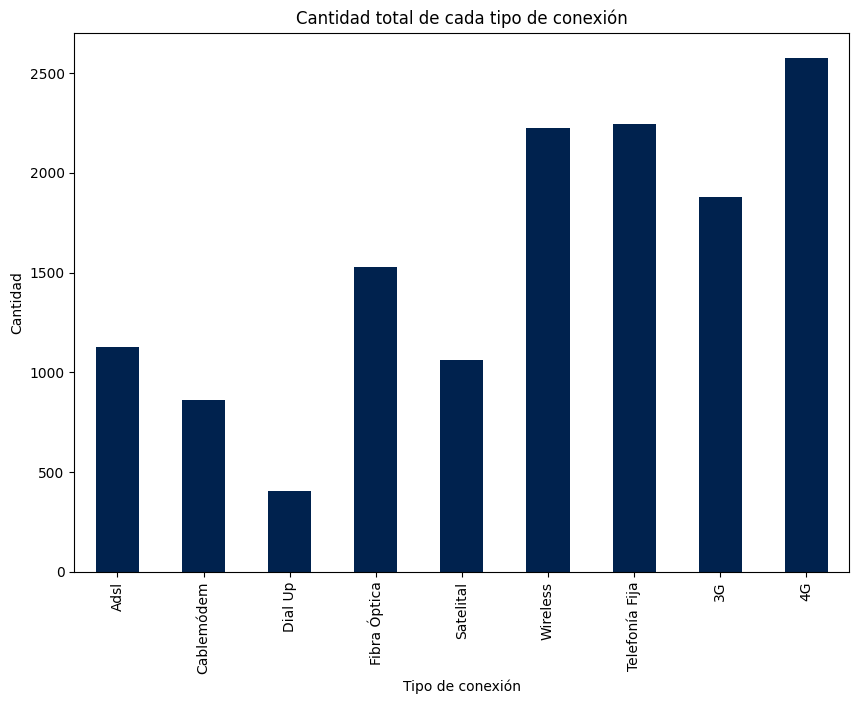

In [55]:
df9[['Adsl', 'Cablemódem', 'Dial Up', 'Fibra Óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']].sum().plot(kind='bar', colormap='cividis', figsize=(10,7))
plt.title('Cantidad total de cada tipo de conexión')
plt.xlabel('Tipo de conexión')
plt.ylabel('Cantidad')
plt.show()

- 4G, 3G, Telefonía fija y Wireless son las conectividades con mayor cantidad

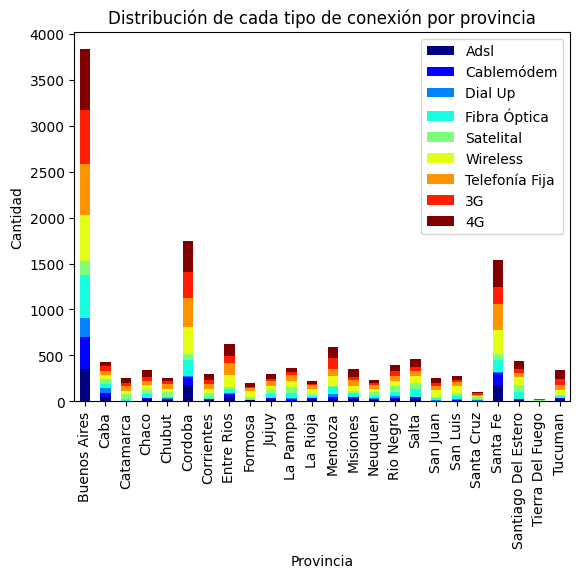

In [14]:
df9.groupby('Provincia')[['Adsl', 'Cablemódem', 'Dial Up', 'Fibra Óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']].sum().plot(kind='bar', stacked=True,colormap='jet')
plt.title('Distribución de cada tipo de conexión por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.show()

- Logramos ver que si agrupamos por provincia la proporción es muy competitiva en 4G, 3G, Telefonía fija, Wireless y Fibra óptica

-listo para trabajarlo

In [56]:
df9_f=df9.to_excel('./data_limpia_excel/Listadode_localidades_con_conectividada_internet_limpio.xlsx', index=False)

### <h3 align=center> `Df_fig1`: **Penetración de Internet fijo (accesos por cada 100 hogares)** </h3>

In [19]:
df_fig1=pd.read_excel('./data_excel/penetracion_internet_fijo.xlsx', sheet_name='hoja2')

In [20]:
df_fig1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


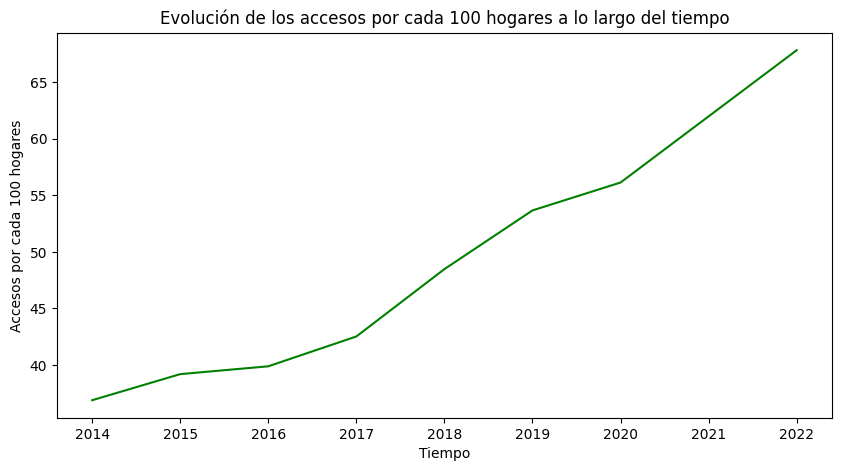

In [26]:
df_grouped = df_fig1.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_grouped, color='green')

plt.title('Evolución de los accesos por cada 100 hogares a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()

- La tendencia de crecimiento observada en el gráfico probablemente continuará en el futuro. La creciente penetración de Internet puede atribuirse a varios factores, incluyendo el desarrollo de la infraestructura de telecomunicaciones, las políticas gubernamentales favorables y la creciente demanda de los consumidores por los servicios de Internet. La creciente demanda de servicios de Internet durante la pandemia puede haber impulsado inversiones adicionales en infraestructura de Internet, lo que a su vez puede haber contribuido al aumento en la penetración de Internet. Algunos ejemplos notables que contribuyeron a esto incluyen el trabajo remoto en muchas empresas, así como el crecimiento de la comunidad de streamers que transmiten en vivo. Estos son ejemplos de cómo la tecnología ha cambiado la forma en que trabajamos y nos conectamos.

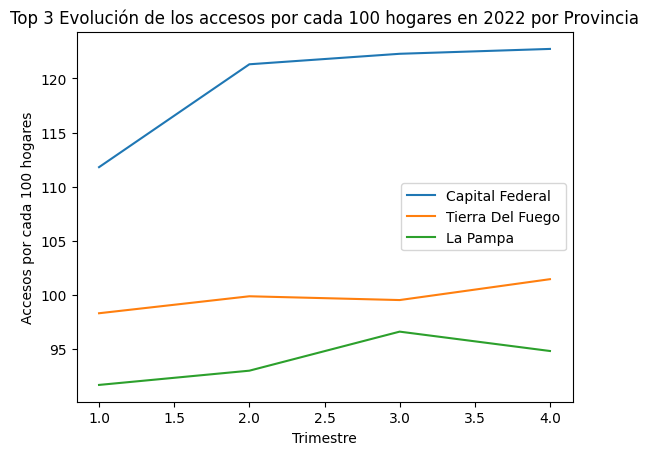

In [237]:
#Solo los datos de 2022
df_2022 = df_fig1[df_fig1['Año'] == 2022]
mean_accesses = df_2022.groupby('Provincia')['Accesos por cada 100 hogares'].mean()
top_provinces = mean_accesses.nlargest(3).index

#Gráfico de línea de los accesos por cada 100 hogares en los 4 trimestres de 2022 para cada una de las tres provincias
for provincia in top_provinces:
    df_2022[df_2022['Provincia'] == provincia].groupby('Trimestre')['Accesos por cada 100 hogares'].mean().plot(kind='line', label=provincia)
plt.title('Top 3 Evolución de los accesos por cada 100 hogares en 2022 por Provincia')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend()
plt.show()

- Seleccionamos el último año(2022) junto con las 3 provincias con mayor acceso y podemos observar que del trimestre 1 al 4, las 3 provincias han logrado ir en subida. Destacando Capital Federal

- pasamos a limpio

In [238]:
df_fig1_f=df_fig1.to_excel('./data_limpia_excel/penetracion_internet_fijo_limpio.xlsx', sheet_name='hoja2', index=False)

### <h3 align=center> **`Df_fig2`: Penetración por hogares nacional de Internet fijo** </h3>

In [2]:
df_fig2=pd.read_excel('./data_excel/penetracion_por_hogares_nacional_inter_fijo.xlsx', sheet_name='hoja3')

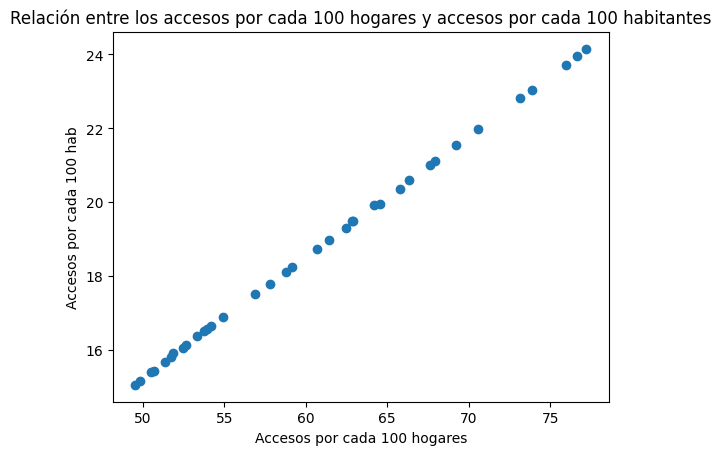

In [3]:
plt.scatter(df_fig2['Accesos por cada 100 hogares'], df_fig2['Accesos por cada 100 hab'])
plt.title('Relación entre los accesos por cada 100 hogares y accesos por cada 100 habitantes')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Accesos por cada 100 hab')
plt.show()

- Diagrama de dispersión que muestra la relación entre "Accesos por cada 100 hogares" y "Accesos por cada 100 habitantes". Logramos apreciar una relación lineal positiva entre las dos variables, lo que significa que a medida que aumenta el número de accesos por cada 100 hogares, también aumenta el número de accesos por cada 100 habitantes. Supongo esto porque los puntos de datos forman una línea recta, lo que generalmente indica una correlación positiva en un diagrama de dispersión.<br>
Y tiene sentido, ya que se debe a que cada hogar generalmente consta de más de un habitante, por lo que un aumento en el número de hogares con acceso a internet fijo probablemente resultará en un aumento en el número total de habitantes con dicho acceso.

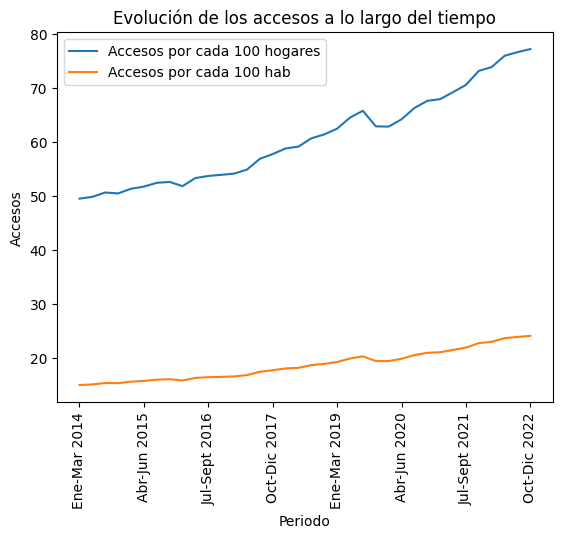

In [4]:
df_fig2.set_index('Periodo')[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']][::-1].plot(kind='line')
plt.title('Evolución de los accesos a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.show()

- Aunque el número total de accesos a internet fijo ha aumentado constantemente con el tiempo, la tasa de accesos por cada 100 habitantes ha crecido a un ritmo más lento. Esto podría deberse a factores como el crecimiento de la población, donde el número de habitantes está creciendo más rápido que el número de accesos a internet fijo, o a factores como la infraestructura de internet, donde la capacidad para proporcionar accesos a internet fijo no ha podido mantenerse al día con la demanda.

In [243]:
df_fig2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


- Pasamos a limpio

In [257]:
df_fig2_f=df_fig2.to_excel('./data_limpia_excel/penetracion_por_hogares_nacional_inter_fijo_limpio.xlsx', sheet_name='hoja3', index=False)

### <h3 align=center> `Df_fig3`: **Serie trimestral de accesos a Internet fijo por tecnología** </h3>

In [6]:
df_fig3=pd.read_excel('./data_excel/serie_trimestral_accesos_interFijoXtecnologia.xlsx', sheet_name='hoja1')

In [8]:
df_fig3.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


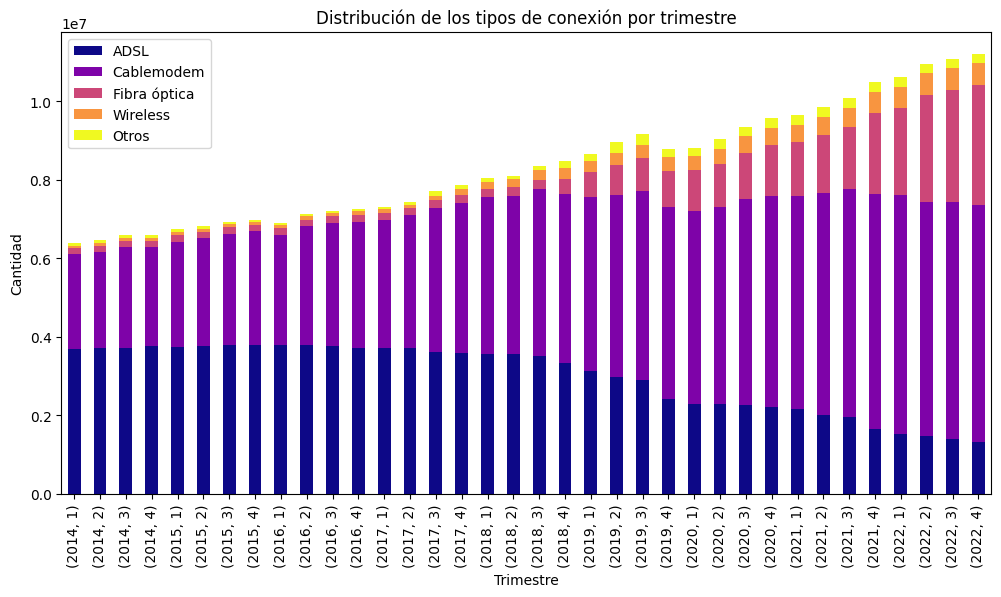

In [20]:
df_fig3.groupby(['Año','Trimestre'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().plot(kind='bar', stacked=True, colormap='plasma', figsize=(12,6))
plt.title('Distribución de los tipos de conexión por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.show()

- Logramos ver un aumento significativo en Fibra óptica con el paso del tiempo a partir del 2019 en adelante, se está convirtiendo en el tipo de conexión a internet más popular, mientras que el ADSL está disminuyendo en popularidad. Los otros tipos de conexiones han permanecido más o menos constantes en su número a lo largo del tiempo. 

In [249]:
df_fig3_f= df_fig3.to_excel('./data_limpia_excel/serie_trimestral_accesos_interFijoXtecnologia_limpio.xlsx', sheet_name='hoja1', index=False)

### <h3 align=center> `Df_fig4`: **Velocidad Media de bajada de Internet fijo** </h3>

In [21]:
df_fig4=pd.read_excel('./data_excel/velocidad_media_bajadaInter_fijo.xlsx', sheet_name='hoja2')

In [23]:
df_fig4.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre1
0,2022,4,106.56,Oct-Dic 2022
1,2022,3,62.46,Jul-Sept 2022
2,2022,2,58.44,Abr-Jun 2022
3,2022,1,55.11,Ene-Mar 2022
4,2021,4,52.34,Oct-Dic 2021


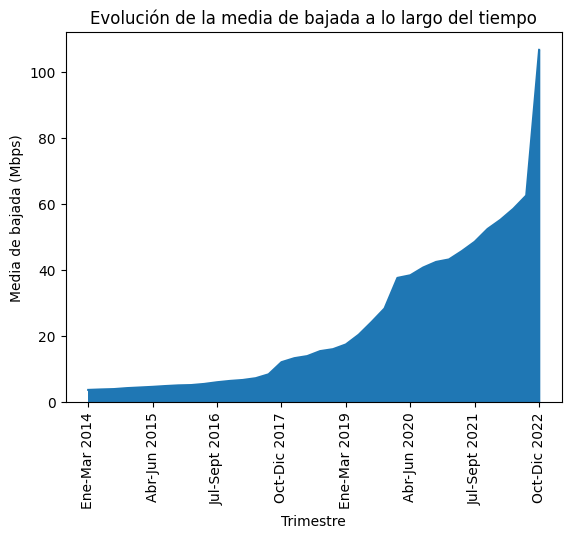

In [253]:
df_fig4.set_index('Trimestre1')['Mbps (Media de bajada)'][::-1].plot(kind='area')
plt.title('Evolución de la media de bajada a lo largo del tiempo')
plt.xlabel('Trimestre')
plt.ylabel('Media de bajada (Mbps)')
plt.xticks(rotation=90)
plt.show()

- El aumento en la velocidad de descarga promedio que mostramos en el gráfico está en línea con las tendencias globales de aumento de las velocidades de internet. Esto puede ser el resultado de varias mejoras en la tecnología y la infraestructura de internet, así como de políticas gubernamentales y esfuerzos de las empresas de telecomunicaciones para ofrecer conexiones a internet más rápidas y confiables.

- pasamos a limpios

In [255]:
df_fig4_f=df_fig4.to_excel('./data_limpia_excel/velocidad_media_bajadaInter_fijo_limpio.xlsx', sheet_name='hoja2', index=False)

### <h3 align=center> **`Df_fig5`: Distribución de los accesos totales nacionales a Internet fijo por velocidad** </h3>

In [24]:
df_fig5=pd.read_excel('./data_excel/Distribucion_accesos_totalesNacionales_a_internetfijoXvelocidad.xlsx', sheet_name='hoja1')

In [25]:
df_fig5.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


In [26]:
df_fig5.rename(columns={'OTROS': 'Otros'}, inplace=True)

In [27]:
df_fig5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      36 non-null     int64
 1   Trimestre                36 non-null     int64
 2   Hasta 512 kbps           36 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   36 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  36 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  36 non-null     int64
 8   Más de 30 Mbps           36 non-null     int64
 9   Otros                    36 non-null     int64
 10  Total                    36 non-null     int64
dtypes: int64(11)
memory usage: 3.2 KB


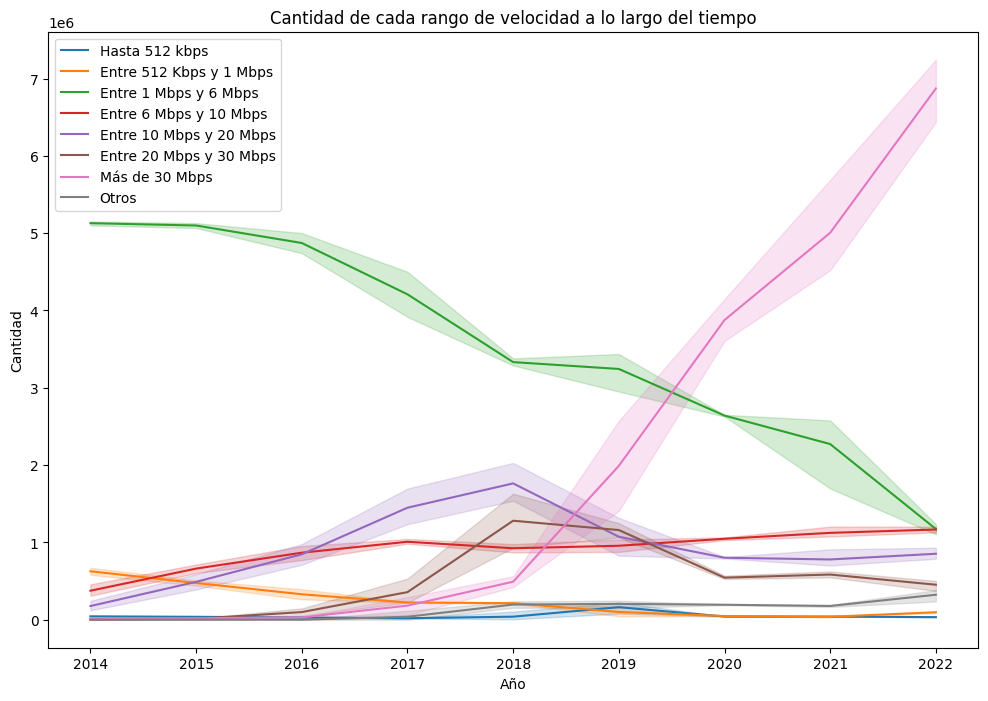

In [46]:
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
df_fig5 = df_fig5.drop('Total', axis=1)  # Quita la columna 'Total'
df_melted = df_fig5.melt(id_vars=['Año', 'Trimestre'], var_name='Rango de velocidad', value_name='Cantidad')
sns.lineplot(x='Año', y='Cantidad', hue='Rango de velocidad', data=df_melted)
plt.title('Cantidad de cada rango de velocidad a lo largo del tiempo')
plt.legend(fontsize='medium')  # Ajusta el tamaño de la leyenda
plt.show()

- A lo largo del tiempo, hemos observado un aumento significativo en el número de usuarios de Internet que disfrutan de velocidades de conexión de más de 30 Mbps. Este fenómeno indica una creciente accesibilidad a conexiones de Internet más rápidas por parte de un número cada vez mayor de personas. Simultáneamente, hemos notado un declive en la utilización de velocidades de conexión de 1 a 6 Mbps con el paso del tiempo. Esto refleja el impacto positivo de la tecnología actual en la mejora de las velocidades de Internet y su accesibilidad para una audiencia más amplia.

- pasamos a csv

In [269]:
df_fig5_f=df_fig5.to_excel('./data_limpia_excel/Distribucion_accesos_totalesNacionales_a_internetfijoXvelocidad2_limpio.xlsx', sheet_name='hoja1', index=False)

### <h3 align=center> **`Df_fig6`: Ingresos trimestrales por la prestación del servicio de Internet fijo** </h3>

In [47]:
df_fig6=pd.read_excel('./data_excel/Ingresos_trimestrales_porPrestancion_del_servicio_intern_fijo.xlsx')

In [48]:
df_fig6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
 3   Periodo                    36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [49]:
df_fig6.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,7.244348e+07,Oct-Dic 2022
1,2022,3,6.408678e+07,Jul-Sept 2022
2,2022,2,6.041950e+07,Abr-Jun 2022
3,2022,1,5.521931e+07,Ene-Mar 2022
4,2021,4,4.546789e+07,Oct-Dic 2021


In [50]:
df_fig6
#Configuramos pandas para no mostrar números en notación científica y ajustar el ancho de columna
pd.set_option('display.float_format', '{:.2f}'.format)
#para que aparezca todo el texto de las columnas
pd.set_option('display.max_colwidth', None)
df_fig6



,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72443482.99,Oct-Dic 2022
1,2022,3,64086784.33,Jul-Sept 2022
2,2022,2,60419500.62,Abr-Jun 2022
3,2022,1,55219313.01,Ene-Mar 2022
4,2021,4,45467887.17,Oct-Dic 2021
5,2021,3,42999944.29,Jul-Sept 2021
6,2021,2,38239666.63,Abr-Jun 2021
7,2021,1,36676371.36,Ene-Mar 2021
8,2020,4,33539702.72,Oct-Dic 2020
9,2020,3,31997444.53,Jul-Sept 2020


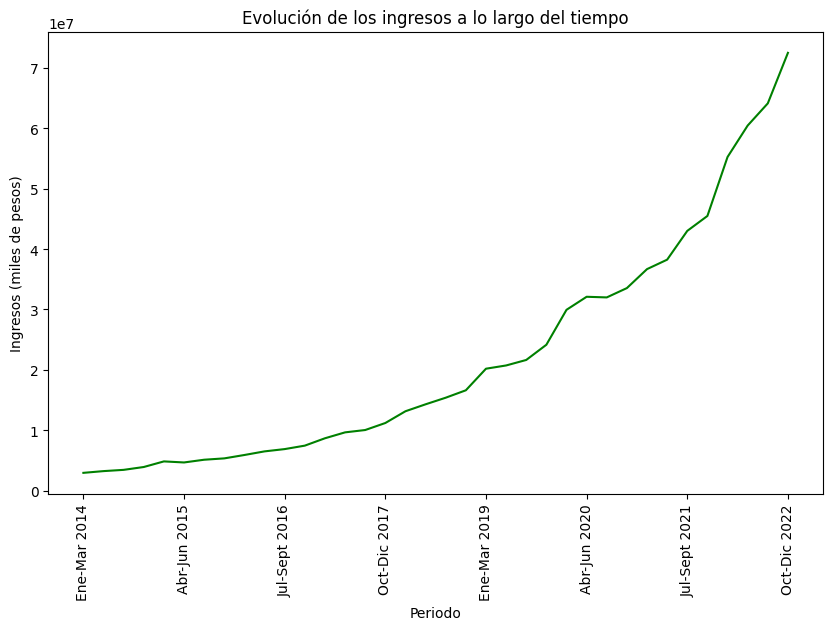

In [56]:
df_fig6.set_index('Periodo')['Ingresos (miles de pesos)'][::-1].plot(kind='line', figsize=(10,6),color='g')
plt.title('Evolución de los ingresos a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=90)
plt.show()

- Los ingresos generados por la provisión de servicios de telecomunicación fija han estado aumentando a lo largo de los años últimamente. Sin embargo, es importante tener en cuenta que estos ingresos pueden verse afectados por una variedad de factores, incluyendo las políticas gubernamentales3, las tendencias del mercado, los cambios en la tecnología y la infraestructura de internet, y la competencia entre los proveedores de servicios de internet.

- pasamos a limpio

In [57]:
df_fig6_f= df_fig6.to_excel('./data_limpia_excel/Ingresos_trimestrales_porPrestancion_del_servicio_intern_fijo_limpio.xlsx', index=False)